In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import cv2
import os
import imageio

In [2]:
import tensorflow as tf
#import tensorflow_addons as tfa
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import load_img, img_to_array

In [3]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=20
CHANNELS=3

In [4]:
directory = tf.keras.preprocessing.image_dataset_from_directory(
    "D:\dataset\data",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2073 files belonging to 3 classes.


In [5]:
categories = directory.class_names
size_data = {}
for i in categories:
    path = os.path.join("D:\dataset\data", i)
    class_num = categories.index(i)
    temp_dict = {}

   
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath)
        Original_image_Size = np.shape(img)
        if len(Original_image_Size) > 2:
          
          
            height, width, channels = cv2.imread(filepath).shape
            if str(height) + ' x ' + str(width) in temp_dict:
                temp_dict[str(height) + ' x ' + str(width)] += 1 
            else:
                temp_dict[str(height) + ' x ' + str(width)] = 1
                
    size_data[i] = temp_dict
        
size_data

{'Bengin cases': {'512 x 512': 120},
 'Malignant cases': {'264 x 409': 1,
  '252 x 342': 1,
  '273 x 400': 1,
  '213 x 423': 1,
  '258 x 437': 1,
  '260 x 443': 1,
  '231 x 380': 2,
  '222 x 376': 1,
  '311 x 413': 1,
  '328 x 409': 1,
  '214 x 398': 1,
  '243 x 397': 1,
  '244 x 392': 1,
  '270 x 429': 1,
  '240 x 404': 2,
  '252 x 466': 1,
  '328 x 422': 1,
  '270 x 363': 1,
  '209 x 396': 2,
  '280 x 315': 1,
  '194 x 367': 1,
  '293 x 425': 1,
  '217 x 357': 1,
  '272 x 337': 1,
  '229 x 381': 1,
  '220 x 377': 1,
  '280 x 437': 1,
  '210 x 386': 1,
  '311 x 418': 1,
  '308 x 416': 2,
  '274 x 449': 1,
  '272 x 373': 1,
  '267 x 423': 1,
  '288 x 449': 1,
  '254 x 437': 1,
  '295 x 389': 1,
  '242 x 416': 1,
  '281 x 369': 1,
  '226 x 371': 1,
  '237 x 306': 1,
  '256 x 438': 1,
  '314 x 425': 1,
  '334 x 409': 1,
  '248 x 392': 1,
  '337 x 434': 1,
  '326 x 424': 2,
  '341 x 475': 1,
  '245 x 363': 1,
  '319 x 456': 1,
  '266 x 379': 1,
  '296 x 427': 1,
  '237 x 376': 1,
  '329 x

In [6]:
image_classes = list(size_data.keys())
number = list(size_data.values())

print(image_classes)
print(number)

['Bengin cases', 'Malignant cases', 'Normal cases']
[{'512 x 512': 120}, {'264 x 409': 1, '252 x 342': 1, '273 x 400': 1, '213 x 423': 1, '258 x 437': 1, '260 x 443': 1, '231 x 380': 2, '222 x 376': 1, '311 x 413': 1, '328 x 409': 1, '214 x 398': 1, '243 x 397': 1, '244 x 392': 1, '270 x 429': 1, '240 x 404': 2, '252 x 466': 1, '328 x 422': 1, '270 x 363': 1, '209 x 396': 2, '280 x 315': 1, '194 x 367': 1, '293 x 425': 1, '217 x 357': 1, '272 x 337': 1, '229 x 381': 1, '220 x 377': 1, '280 x 437': 1, '210 x 386': 1, '311 x 418': 1, '308 x 416': 2, '274 x 449': 1, '272 x 373': 1, '267 x 423': 1, '288 x 449': 1, '254 x 437': 1, '295 x 389': 1, '242 x 416': 1, '281 x 369': 1, '226 x 371': 1, '237 x 306': 1, '256 x 438': 1, '314 x 425': 1, '334 x 409': 1, '248 x 392': 1, '337 x 434': 1, '326 x 424': 2, '341 x 475': 1, '245 x 363': 1, '319 x 456': 1, '266 x 379': 1, '296 x 427': 1, '237 x 376': 1, '329 x 419': 1, '302 x 385': 1, '276 x 389': 1, '255 x 413': 1, '328 x 384': 1, '302 x 384': 1

In [7]:
bengin_num = sum(size_data['Bengin cases'].values())
malignant_num = sum(size_data['Malignant cases'].values())
normal_num = sum(size_data['Normal cases'].values())

print("Number of Benign Cases ->", bengin_num)
print("Number of Malignant Cases ->", malignant_num)
print("Number of Normal Cases ->", normal_num)

Number of Benign Cases -> 120
Number of Malignant Cases -> 1339
Number of Normal Cases -> 614


In [8]:
num_list = [bengin_num, malignant_num, normal_num]
print(num_list)

[120, 1339, 614]


In [9]:
all_image = malignant_num + bengin_num + normal_num
print("Total Number of Images ->", all_image)

Total Number of Images -> 2073


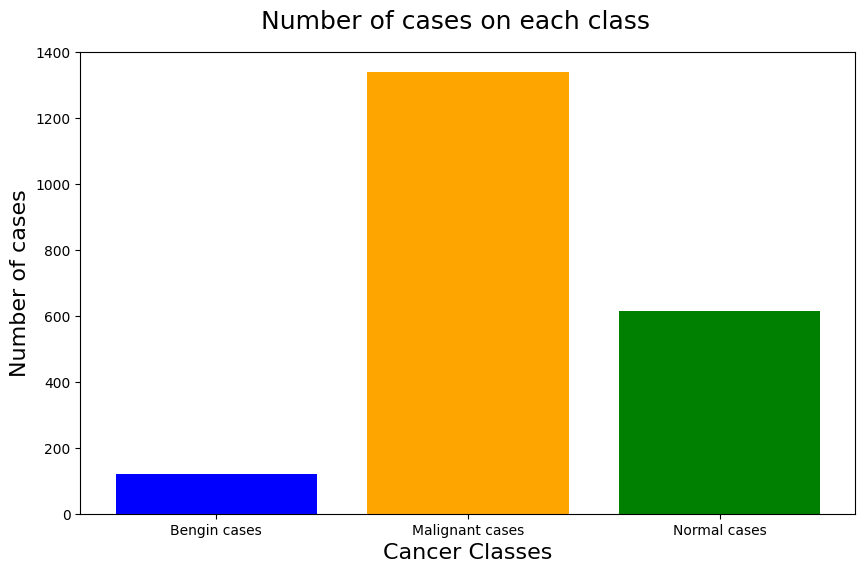

In [10]:
c = ['blue', 'orange', 'green']

plt.rcParams["figure.figsize"] = (10,6)
plt.bar(range(len(num_list)), num_list, tick_label=image_classes, color = c)
plt.suptitle('Number of cases on each class', y=0.95, fontsize=18)
plt.xlabel('Cancer Classes', fontsize=16)
plt.ylabel('Number of cases', fontsize=16)
plt.ylim([0, 1400])
plt.show()

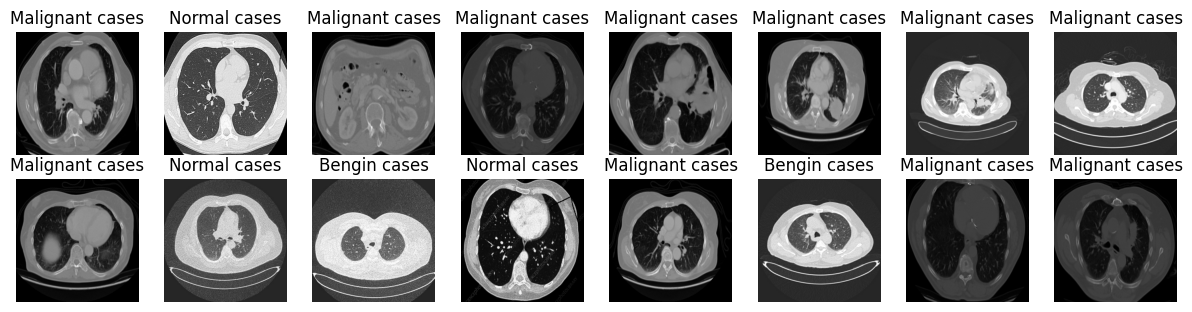

In [11]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in directory.take(1):
    for i in range(16):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(categories[labels_batch[i]])
        plt.axis("off")

In [12]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
])

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(directory)

In [15]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = 3


model = tf.keras.models.Sequential([
    resize_and_rescale,
    
    tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [16]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if (logs.get('accuracy') >= 0.97):
                print("\nReached 97% accuracy so cancelling training!") 
                self.model.stop_training = True

callbacks = myCallback()

In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [19]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
    callbacks=[callbacks]
)

Epoch 1/20
27/27 [==============================] - 113s 4s/step - loss: 0.9007 - accuracy: 0.5908 - val_loss: 0.8678 - val_accuracy: 0.6398
Epoch 2/20
27/27 [==============================] - 89s 3s/step - loss: 0.7860 - accuracy: 0.6487 - val_loss: 0.6639 - val_accuracy: 0.6720
Epoch 3/20
27/27 [==============================] - 96s 4s/step - loss: 0.6284 - accuracy: 0.6935 - val_loss: 0.6195 - val_accuracy: 0.6720
Epoch 4/20
27/27 [==============================] - 97s 4s/step - loss: 0.5622 - accuracy: 0.7395 - val_loss: 0.4754 - val_accuracy: 0.8441
Epoch 5/20
27/27 [==============================] - 99s 4s/step - loss: 0.4158 - accuracy: 0.8309 - val_loss: 0.3296 - val_accuracy: 0.8710
Epoch 6/20
27/27 [==============================] - 97s 4s/step - loss: 0.3634 - accuracy: 0.8578 - val_loss: 0.2580 - val_accuracy: 0.9086
Epoch 7/20
27/27 [==============================] - 96s 4s/step - loss: 0.2781 - accuracy: 0.8973 - val_loss: 0.1945 - val_accuracy: 0.9247
Epoch 8/20
27/27 [=

In [20]:
model.evaluate(test_ds)

4/4 [==============================] - 23s 665ms/step - loss: 0.0586 - accuracy: 0.9758


[0.05857875943183899, 0.975806474685669]

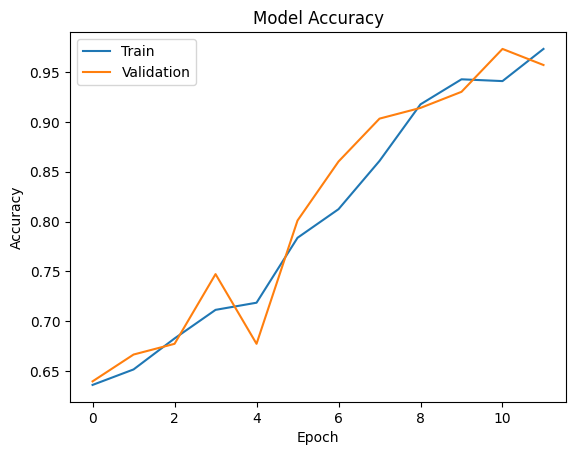

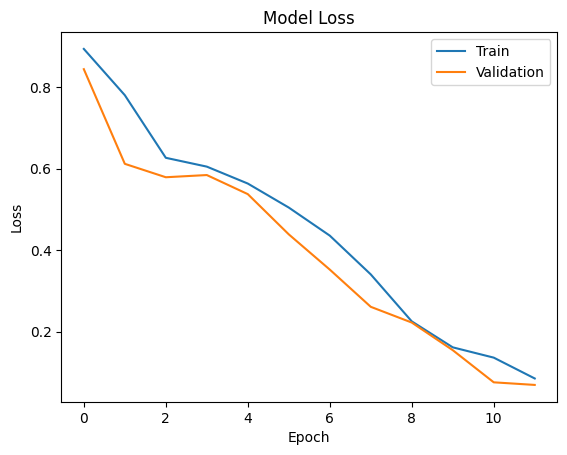

In [19]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1/1 [==============================] - 0s 425ms/step


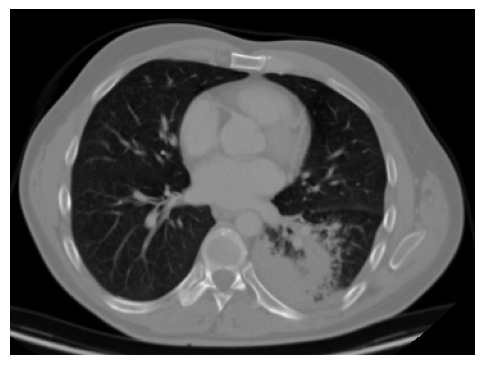

Predicted case -> Malignant cases


In [23]:
image_path =r"C:\Users\krish\Desktop\Project\000006 (4).png"
image = tf.keras.preprocessing.image.load_img(image_path)
image_array = tf.keras.preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")
pred = model.predict(scaled_img)
output = categories[np.argmax(pred)]
plt.show()
print("Predicted case ->", output)

In [28]:

import joblib
import pickle

In [29]:
filename = "Completed_model.joblib"
joblib.dump(model, filename)

['Completed_model.joblib']

1/1 [==============================] - 1s 1s/step


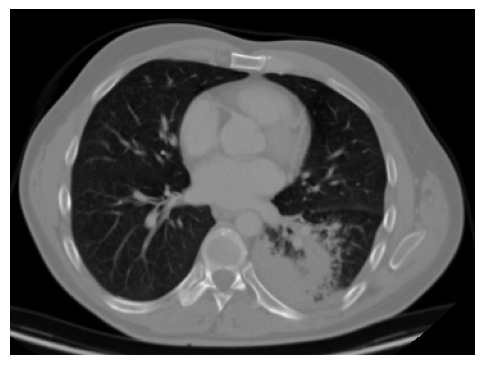

Predicted case -> Malignant cases


In [30]:
loaded_model = joblib.load(filename)

image_path =r"C:\Users\krish\Desktop\Project\000006 (4).png"
image = tf.keras.preprocessing.image.load_img(image_path)
image_array = tf.keras.preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")

pred = loaded_model.predict(scaled_img)

output = categories[np.argmax(pred)]
plt.show()
print("Predicted case ->", output)